<a href="https://colab.research.google.com/github/maulanaakbardj/Forecasting-vaccination-/blob/main/EDA_%26_Facebook's_Prophet_Algorithm_Fix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [ ]:
data = pd.read_csv('/content/vaksin indo.csv', delimiter=';')
data.head()

,Tanggal,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Vaksinasi 1 Pelayan publik,Vaksinasi 2 Pelayan publik,Target Vaksinisasi total Indonesia,Vaksinasi 1 Total Indonesia,Vaksinasi 2 Total Indonesia
0,05-Mar-21,1692016,1111938,179711,2,541888,2597,40349051,2413615,1114537
1,06-Mar-21,1741784,1126353,206025,2,604456,4169,40349051,2552265,1130524
2,07-Mar-21,2049651,1129340,215632,2,623474,4445,40349051,2888757,1133787
3,08-Mar-21,2114655,1149547,267603,5,715767,8880,40349051,3098025,1158432
4,09-Mar-21,1395498,1127633,430591,1612,1510937,68527,40349051,3337026,1197772


In [ ]:
data.value_counts()

Tanggal    Vaksinasi 1 Tenaga Kesehatan  Vaksinasi 2 Tenaga Kesehatan  Vaksinasi 1 Lansia  Vaksinasi 2 Lansia  Vaksinasi 1 Pelayan publik  Vaksinasi 2 Pelayan publik  Target Vaksinisasi total Indonesia  Vaksinasi 1 Total Indonesia  Vaksinasi 2 Total Indonesia
31-May-21  1518202                       1386778                       3340338             2198723             11663306                    7111644                     40349051                            16521846                     10697145                       1
16-Aug-21  1612024                       1490394                       5027024             3470203             47049074                    23151688                    208265720                           53688122                     28112285                       1
12-Aug-21  1605836                       1478463                       4974734             3372273             45313996                    20652113                    208265720                           5189456

In [ ]:
data['Tanggal']=pd.to_datetime(data['Tanggal'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             177 non-null    datetime64[ns]
 1   Vaksinasi 1 Tenaga Kesehatan        177 non-null    int64         
 2   Vaksinasi 2 Tenaga Kesehatan        177 non-null    int64         
 3   Vaksinasi 1 Lansia                  177 non-null    int64         
 4   Vaksinasi 2 Lansia                  177 non-null    int64         
 5   Vaksinasi 1 Pelayan publik          177 non-null    int64         
 6   Vaksinasi 2 Pelayan publik          177 non-null    int64         
 7   Target Vaksinisasi total Indonesia  177 non-null    int64         
 8   Vaksinasi 1 Total Indonesia         177 non-null    int64         
 9   Vaksinasi 2 Total Indonesia         177 non-null    int64         
dtypes: datetime64[ns](1), int6

In [ ]:
data.describe()

,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Vaksinasi 1 Pelayan publik,Vaksinasi 2 Pelayan publik,Target Vaksinisasi total Indonesia,Vaksinasi 1 Total Indonesia,Vaksinasi 2 Total Indonesia
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,1.531750e+06,1.373600e+06,3.329309e+06,1.972429e+06,1.908641e+07,8.702169e+06,1.009577e+08,2.394746e+07,1.204820e+07
std,8.764121e+04,9.298908e+04,1.499630e+06,1.202787e+06,1.570838e+07,7.060218e+06,7.380914e+07,1.708012e+07,8.194439e+06
min,1.395498e+06,1.111938e+06,1.797110e+05,2.000000e+00,5.418880e+05,2.597000e+03,4.034905e+07,2.413615e+06,1.114537e+06
25%,1.481515e+06,1.324382e+06,2.203494e+06,9.369630e+05,7.159290e+06,3.649998e+06,4.034905e+07,1.082799e+07,5.911343e+06
50%,1.522193e+06,1.386931e+06,3.345008e+06,2.200524e+06,1.170450e+07,7.132916e+06,4.034905e+07,1.656789e+07,1.072037e+07
75%,1.585054e+06,1.433358e+06,4.810970e+06,3.015499e+06,3.254161e+07,1.111128e+07,1.815545e+08,3.927815e+07,1.568553e+07
max,2.114655e+06,1.596183e+06,5.231538e+06,4.826749e+06,5.393519e+07,2.921438e+07,2.082657e+08,6.079162e+07,3.443570e+07


In [ ]:
state_wise = data.groupby('Tanggal')['Target Vaksinisasi total Indonesia','Vaksinasi 1 Total Indonesia'].sum().reset_index()
state_wise["Persentase Vaksinasi 1"] = ((state_wise["Vaksinasi 1 Total Indonesia"] / state_wise["Target Vaksinisasi total Indonesia"]) * 100)
state_wise.style.background_gradient(cmap='magma')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Tanggal,Target Vaksinisasi total Indonesia,Vaksinasi 1 Total Indonesia,Persentase Vaksinasi 1
0,2021-03-05 00:00:00,40349051,2413615,5.981838
1,2021-03-06 00:00:00,40349051,2552265,6.325465
2,2021-03-07 00:00:00,40349051,2888757,7.159417
3,2021-03-08 00:00:00,40349051,3098025,7.678062
4,2021-03-09 00:00:00,40349051,3337026,8.270395
5,2021-03-10 00:00:00,40349051,3572519,8.854035
6,2021-03-11 00:00:00,40349051,3696059,9.160213
7,2021-03-12 00:00:00,40349051,3696059,9.160213
8,2021-03-13 00:00:00,40349051,3985596,9.877794
9,2021-03-14 00:00:00,40349051,4020124,9.963367


In [ ]:
px.bar(x=state_wise.nlargest(10,"Persentase Vaksinasi 1")["Tanggal"],
       y = state_wise.nlargest(10,"Persentase Vaksinasi 1")["Persentase Vaksinasi 1"],
       color_discrete_sequence=px.colors.diverging.Picnic,
       title="Top 10 dates with percentage of first dose vaccination")

In [ ]:
state_wise2 = data.groupby('Tanggal')['Target Vaksinisasi total Indonesia','Vaksinasi 2 Total Indonesia'].sum().reset_index()
state_wise2["Persentase Vaksinasi 2"] = ((state_wise2["Vaksinasi 2 Total Indonesia"] / state_wise2["Target Vaksinisasi total Indonesia"]) * 100)
state_wise.style.background_gradient(cmap='magma')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Tanggal,Target Vaksinisasi total Indonesia,Vaksinasi 1 Total Indonesia,Persentase Vaksinasi 1
0,2021-03-05 00:00:00,40349051,2413615,5.981838
1,2021-03-06 00:00:00,40349051,2552265,6.325465
2,2021-03-07 00:00:00,40349051,2888757,7.159417
3,2021-03-08 00:00:00,40349051,3098025,7.678062
4,2021-03-09 00:00:00,40349051,3337026,8.270395
5,2021-03-10 00:00:00,40349051,3572519,8.854035
6,2021-03-11 00:00:00,40349051,3696059,9.160213
7,2021-03-12 00:00:00,40349051,3696059,9.160213
8,2021-03-13 00:00:00,40349051,3985596,9.877794
9,2021-03-14 00:00:00,40349051,4020124,9.963367


In [ ]:
px.bar(x=state_wise2.nlargest(10,"Persentase Vaksinasi 2")["Tanggal"],
       y = state_wise2.nlargest(10,"Persentase Vaksinasi 2")["Persentase Vaksinasi 2"],
       color_discrete_sequence=px.colors.diverging.Picnic,
       title="Top 10 dates with percentage of second dose vaccination")

In [ ]:
tenaga_kesehatan = data["Vaksinasi 1 Tenaga Kesehatan"].sum() 
lansia = data["Vaksinasi 1 Lansia"].sum()  
pelayan_publik = data["Vaksinasi 1 Pelayan publik"].sum()
px.pie(names=["Tenaga Kesehatan","Lansia","Pelayan publik"],values=[tenaga_kesehatan,lansia,pelayan_publik],title="Indonesia's first total dose of vaccination")

In [ ]:
tenaga_kesehatan2 = data["Vaksinasi 2 Tenaga Kesehatan"].sum() 
lansia2 = data["Vaksinasi 2 Lansia"].sum()  
pelayan_publik2 = data["Vaksinasi 2 Pelayan publik"].sum()
px.pie(names=["Tenaga Kesehatan","Lansia","Pelayan publik"],values=[tenaga_kesehatan2,lansia2,pelayan_publik2],title="Indonesia's second total dose of vaccination")

In [ ]:
vaksin1 = data["Vaksinasi 1 Total Indonesia"].sum() 
vaksin2 = data["Vaksinasi 2 Total Indonesia"].sum()  
px.pie(names=["Vaksinasi 1","Vaksinasi 2"],values=[vaksin1,vaksin2],title="Indonesia's total vaccination")

In [ ]:
data.loc[data['Vaksinasi 1 Total Indonesia'].idxmax()]

Tanggal                               2021-08-28 00:00:00
Vaksinasi 1 Tenaga Kesehatan                      1642557
Vaksinasi 2 Tenaga Kesehatan                      1523167
Vaksinasi 1 Lansia                                5213872
Vaksinasi 2 Lansia                                3698155
Vaksinasi 1 Pelayan publik                       53935191
Vaksinasi 2 Pelayan publik                       29214383
Target Vaksinisasi total Indonesia              208265720
Vaksinasi 1 Total Indonesia                      60791620
Vaksinasi 2 Total Indonesia                      34435705
Name: 176, dtype: object

In [ ]:
no_vaksin1=270203917-60791620 #Total penduduk Indonesia: 270203917 https://sensus.bps.go.id/main/index/sp2020
vak1=60791620

In [ ]:
px.pie(names=["Belum vaksin","total vaksinisasi dosis ke-1"],values=[no_vaksin1,vak1],title="Belum Vaksin vs Sudah vaksin dosis ke-1")

In [ ]:
no_vaksin2=270203917-34435705 #Total penduduk Indonesia: 270203917 https://sensus.bps.go.id/main/index/sp2020
vak2=34435705
px.pie(names=["Belum vaksin ke-2","total vaksinisasi dosis ke-2"],values=[no_vaksin2,vak2],title="Belum Vaksin ke-2 vs Sudah vaksin ke-2")

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Belum Vaksin vs Sudah vaksin dosis ke-1', 'Belum Vaksin ke-2 vs Sudah vaksin ke-2'])
fig.add_trace(go.Pie(labels=["Belum vaksin","total vaksinisasi dosis ke-1"], values=[no_vaksin1,vak1], name="Belum Vaksin vs Sudah vaksin dosis ke-1"),
              1, 1)
fig.add_trace(go.Pie(labels=["Belum vaksin ke-2","total vaksinisasi dosis ke-2"], values=[no_vaksin2,vak2], name="Belum Vaksin ke-2 vs Sudah vaksin ke-2"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Vaksinisasi di Indonesia 28 Agustus 2021")
fig.show()

# Forecast Vaccines Prophet

## Vaksinisasi Ke-1


In [ ]:
import numpy as np # numpy arrays / linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # map plot
import warnings
warnings.filterwarnings('ignore') 

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
from scipy.optimize import curve_fit # predictive modeling
import seaborn as sns
import statsmodels.api as sm

import datetime
from datetime import date

In [ ]:
df1 = pd.read_csv('/content/vaksin indo.csv', delimiter=';', index_col='Tanggal', header=0)
df1 = df1["Vaksinasi 1 Total Indonesia"]
df1.dropna(inplace=True)
df1 = df1.reset_index()
df1.head()

,Tanggal,Vaksinasi 1 Total Indonesia
0,05-Mar-21,2413615
1,06-Mar-21,2552265
2,07-Mar-21,2888757
3,08-Mar-21,3098025
4,09-Mar-21,3337026


In [ ]:
df1['Tanggal']=pd.to_datetime(df1['Tanggal'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Tanggal                      177 non-null    datetime64[ns]
 1   Vaksinasi 1 Total Indonesia  177 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB


In [ ]:
df1=df1.rename(columns={'Tanggal':'ds', 'Vaksinasi 1 Total Indonesia':'y'})
df1.head()

,ds,y
0,2021-03-05,2413615
1,2021-03-06,2552265
2,2021-03-07,2888757
3,2021-03-08,3098025
4,2021-03-09,3337026


In [ ]:
from fbprophet import Prophet
model1 = Prophet(daily_seasonality=True)
model1.fit(df1);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future1= model1.make_future_dataframe(periods=150, freq = 'd')
future1.tail()

,ds
322,2022-01-21
323,2022-01-22
324,2022-01-23
325,2022-01-24
326,2022-01-25


In [ ]:
forecast1 = model1.predict(future1)

In [ ]:
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
322,2022-01-21,1.275278e+08,1.025523e+08,1.521740e+08,1.024743e+08,1.523659e+08,-25531.509253,-25531.509253,-25531.509253,-72429.750901,-72429.750901,-72429.750901,46898.241648,46898.241648,46898.241648,0.0,0.0,0.0,1.275023e+08
323,2022-01-22,1.279914e+08,1.025656e+08,1.531318e+08,1.026428e+08,1.531586e+08,66951.023932,66951.023932,66951.023932,-72429.750901,-72429.750901,-72429.750901,139380.774833,139380.774833,139380.774833,0.0,0.0,0.0,1.280584e+08
324,2022-01-23,1.284551e+08,1.027014e+08,1.536721e+08,1.028326e+08,1.538639e+08,-47005.518229,-47005.518229,-47005.518229,-72429.750901,-72429.750901,-72429.750901,25424.232672,25424.232672,25424.232672,0.0,0.0,0.0,1.284081e+08
325,2022-01-24,1.289187e+08,1.026476e+08,1.541434e+08,1.029894e+08,1.545225e+08,-176682.948523,-176682.948523,-176682.948523,-72429.750901,-72429.750901,-72429.750901,-104253.197622,-104253.197622,-104253.197622,0.0,0.0,0.0,1.287421e+08
326,2022-01-25,1.293824e+08,1.027720e+08,1.550219e+08,1.031231e+08,1.551913e+08,-174216.166327,-174216.166327,-174216.166327,-72429.750901,-72429.750901,-72429.750901,-101786.415426,-101786.415426,-101786.415426,0.0,0.0,0.0,1.292082e+08


In [ ]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
317,2022-01-16,1.251625e+08,1.012171e+08,1.486315e+08
318,2022-01-17,1.254965e+08,1.012610e+08,1.491896e+08
319,2022-01-18,1.259626e+08,1.015248e+08,1.498824e+08
320,2022-01-19,1.264703e+08,1.018827e+08,1.508727e+08
321,2022-01-20,1.270438e+08,1.022891e+08,1.514790e+08
322,2022-01-21,1.275023e+08,1.025523e+08,1.521740e+08
323,2022-01-22,1.280584e+08,1.025656e+08,1.531318e+08
324,2022-01-23,1.284081e+08,1.027014e+08,1.536721e+08
325,2022-01-24,1.287421e+08,1.026476e+08,1.541434e+08
326,2022-01-25,1.292082e+08,1.027720e+08,1.550219e+08


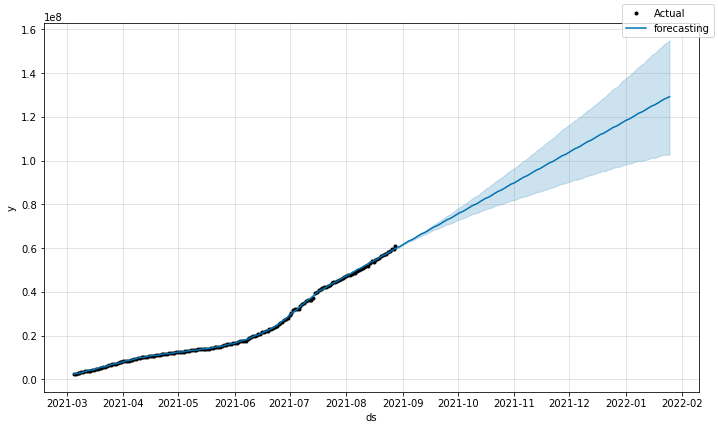

In [ ]:
a1=model1.plot(forecast1);
a1.legend(['Actual','forecasting'], loc='best')


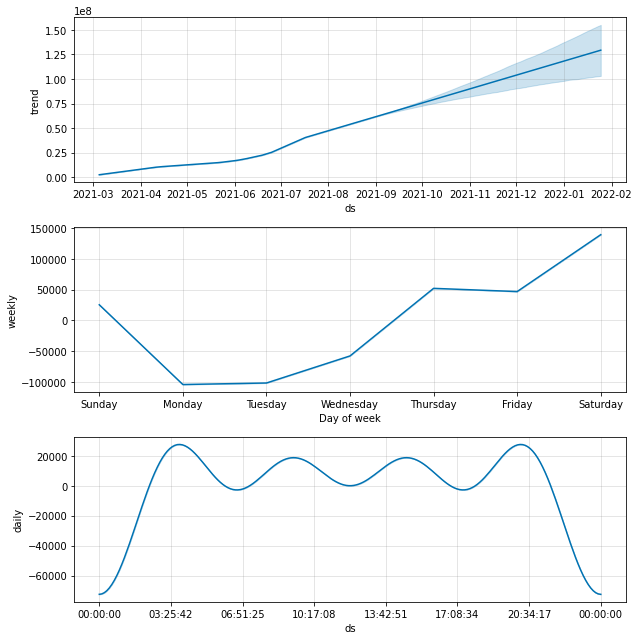

In [ ]:
model1.plot_components(forecast1);

In [ ]:
metric_df1 = forecast1.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()

In [ ]:
metric_df1.dropna(inplace=True)
metric_df1.tail()

,ds,yhat,y
172,2021-08-24,5.780608e+07,58023024.0
173,2021-08-25,5.831373e+07,58712105.0
174,2021-08-26,5.888728e+07,59381203.0
175,2021-08-27,5.934571e+07,59426937.0
176,2021-08-28,5.990184e+07,60791620.0


In [ ]:
from sklearn.metrics import r2_score
r2_score(metric_df1.y, metric_df1.yhat)

0.999728410234192

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(metric_df1.y, metric_df1.yhat)

78783405492.30257

In [ ]:
metric_df1.yhat.mean()

23947491.218860567

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(metric_df1.y, metric_df1.yhat))

196909.40998230962


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(metric_df1.y, metric_df1.yhat))

141675.83460079134


In [ ]:
from math import sqrt
rmse1 = sqrt(mean_squared_error(metric_df1.y, metric_df1.yhat))
print(rmse1)

280683.81765307125


## Vaksinisasi Ke-2


In [ ]:
df2 = pd.read_csv('/content/vaksin indo.csv', delimiter=';', index_col='Tanggal', header=0)
df2 = df2["Vaksinasi 2 Total Indonesia"]
df2.dropna(inplace=True)
df2 = df2.reset_index()
df2.head()

,Tanggal,Vaksinasi 2 Total Indonesia
0,05-Mar-21,1114537
1,06-Mar-21,1130524
2,07-Mar-21,1133787
3,08-Mar-21,1158432
4,09-Mar-21,1197772


In [ ]:
df2['Tanggal']=pd.to_datetime(df2['Tanggal'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Tanggal                      177 non-null    datetime64[ns]
 1   Vaksinasi 2 Total Indonesia  177 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB


In [ ]:
df2=df2.rename(columns={'Tanggal':'ds', 'Vaksinasi 2 Total Indonesia':'y'})
df2.head()

,ds,y
0,2021-03-05,1114537
1,2021-03-06,1130524
2,2021-03-07,1133787
3,2021-03-08,1158432
4,2021-03-09,1197772


In [ ]:
model2 = Prophet(daily_seasonality=True)
model2.fit(df2);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future2= model2.make_future_dataframe(periods=195, freq = 'd')
future2.tail()

,ds
367,2022-03-07
368,2022-03-08
369,2022-03-09
370,2022-03-10
371,2022-03-11


In [ ]:
forecast2 = model2.predict(future2)

In [ ]:
forecast2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
367,2022-03-07,1.272219e+08,1.080773e+08,1.461757e+08,1.085045e+08,1.466162e+08,-365926.274829,-365926.274829,-365926.274829,-299752.022808,-299752.022808,-299752.022808,-66174.252021,-66174.252021,-66174.252021,0.0,0.0,0.0,1.268560e+08
368,2022-03-08,1.277086e+08,1.085762e+08,1.468724e+08,1.087746e+08,1.472661e+08,-332814.735078,-332814.735078,-332814.735078,-299752.022808,-299752.022808,-299752.022808,-33062.712270,-33062.712270,-33062.712270,0.0,0.0,0.0,1.273758e+08
369,2022-03-09,1.281954e+08,1.086532e+08,1.474382e+08,1.090489e+08,1.478995e+08,-312607.764706,-312607.764706,-312607.764706,-299752.022808,-299752.022808,-299752.022808,-12855.741898,-12855.741898,-12855.741898,0.0,0.0,0.0,1.278828e+08
370,2022-03-10,1.286822e+08,1.091284e+08,1.481746e+08,1.093181e+08,1.485718e+08,-293099.468658,-293099.468658,-293099.468658,-299752.022808,-299752.022808,-299752.022808,6652.554150,6652.554150,6652.554150,0.0,0.0,0.0,1.283891e+08
371,2022-03-11,1.291689e+08,1.094541e+08,1.489331e+08,1.095865e+08,1.492654e+08,-274639.264600,-274639.264600,-274639.264600,-299752.022808,-299752.022808,-299752.022808,25112.758208,25112.758208,25112.758208,0.0,0.0,0.0,1.288943e+08


In [ ]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
362,2022-03-02,1.244755e+08,1.064166e+08,1.431230e+08
363,2022-03-03,1.249817e+08,1.066149e+08,1.438856e+08
364,2022-03-04,1.254870e+08,1.070635e+08,1.444003e+08
365,2022-03-05,1.260171e+08,1.074684e+08,1.450913e+08
366,2022-03-06,1.264472e+08,1.078964e+08,1.455048e+08
367,2022-03-07,1.268560e+08,1.080773e+08,1.461757e+08
368,2022-03-08,1.273758e+08,1.085762e+08,1.468724e+08
369,2022-03-09,1.278828e+08,1.086532e+08,1.474382e+08
370,2022-03-10,1.283891e+08,1.091284e+08,1.481746e+08
371,2022-03-11,1.288943e+08,1.094541e+08,1.489331e+08


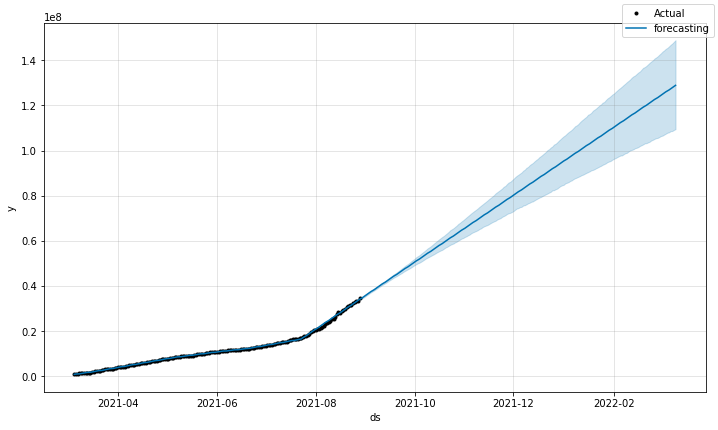

In [ ]:
a2=model2.plot(forecast2);
a2.legend(['Actual','forecasting'], loc='best')


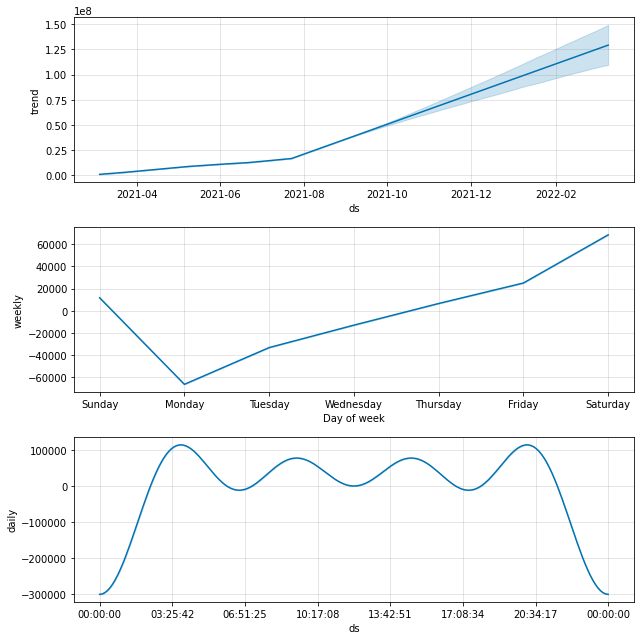

In [ ]:
model2.plot_components(forecast2);

In [ ]:
metric_df2 = forecast2.set_index('ds')[['yhat']].join(df2.set_index('ds').y).reset_index()

In [ ]:
metric_df2.dropna(inplace=True)
metric_df2.tail()

,ds,yhat,y
172,2021-08-24,3.197109e+07,32247250.0
173,2021-08-25,3.247805e+07,32799216.0
174,2021-08-26,3.298432e+07,33344151.0
175,2021-08-27,3.348954e+07,33357347.0
176,2021-08-28,3.401969e+07,34435705.0


In [ ]:
r2_score(metric_df2.y, metric_df2.yhat)

0.9991296505242707

In [ ]:
mean_squared_error(metric_df2.y, metric_df2.yhat)

58112764378.61912

In [ ]:
metric_df2.yhat.mean()

12048185.41961242

In [ ]:
print(mean_absolute_error(metric_df2.y, metric_df2.yhat))

157583.60234176466


In [ ]:
print(median_absolute_error(metric_df2.y, metric_df2.yhat))

88336.4192787949


In [ ]:
rmse2 = sqrt(mean_squared_error(metric_df2.y, metric_df2.yhat))
print(rmse2)

241065.8921926101
